In [21]:
import os
import json
import matplotlib.pyplot as plt

In [20]:
def get_sorted(name):
    runs = [
        x for x in os.listdir('results') if x.startswith(name)
    ]
    sorted_runs = sorted(runs, key=lambda x: int(x.split('_')[-1].replace('.json', '')))
    json_datas = []
    for run in sorted_runs:
        with open(f'results/{run}', 'r') as f:
            json_datas.append(json.load(f)['test_set_perplexities'])
    return json_datas

data = {
    name: get_sorted(name) for name in ['bert', 'gpt2', 'roberta', 'xlm_roberta']
}

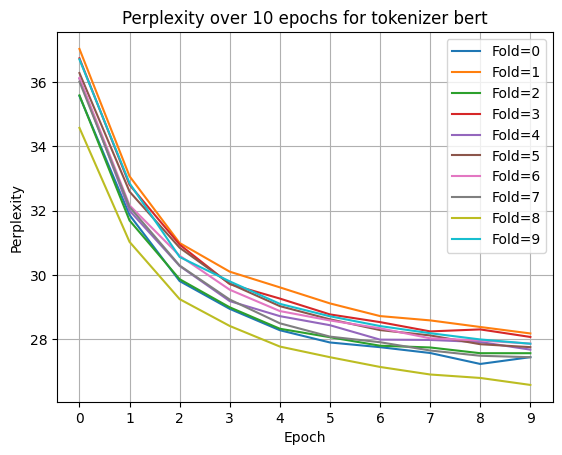

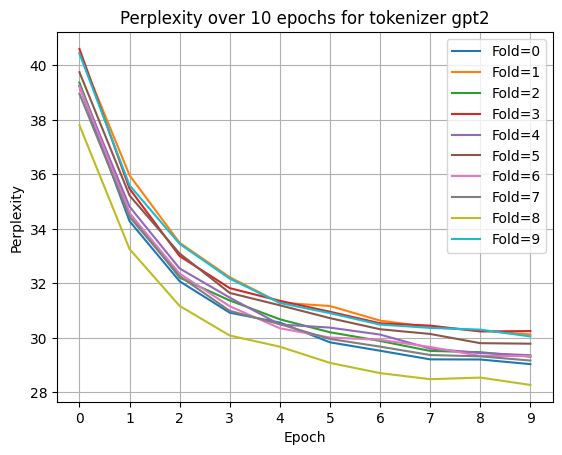

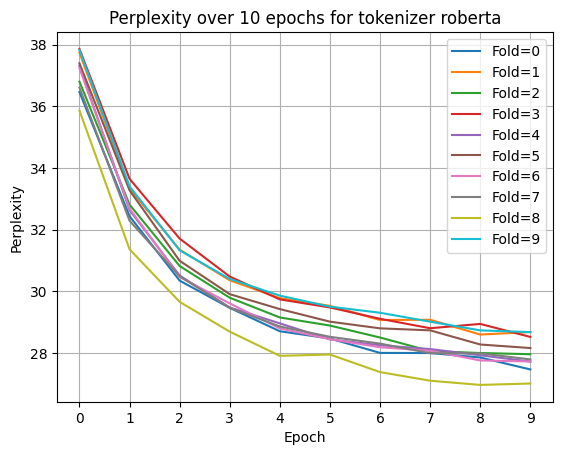

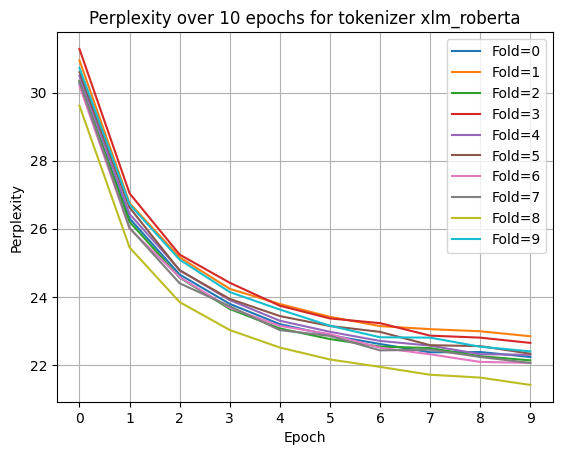

In [28]:
for name in data:
    plt.figure()
    ppls = data[name] # 10 epochs over each of 10 folds
    for i, fold in enumerate(ppls):
        plt.plot(fold, label=f'Fold={i}')
        
    plt.legend()
    plt.ylabel('Perplexity')
    plt.title(f'Perplexity over 10 epochs for tokenizer {name}')
    plt.xlabel('Epoch')
    plt.xticks(range(10))
    plt.grid()
    plt.savefig(f'plots/{name}.png')